In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
import warnings
warnings.filterwarnings('ignore')

In [2]:
tex_fonts = {
    "text.usetex": True,
    "font.family": "serif",
    "font.sans-serif": ["Palatino"],
    "axes.labelsize": 12,
    "font.size": 12,
    "legend.fontsize": 10,
    "xtick.labelsize": 11,
    "ytick.labelsize": 11
}

plt.rcParams.update(tex_fonts)

In [3]:
def set_size(width_pt, fraction=1, subplots=(1, 1)):

    # Width of figure (in pts)
    fig_width_pt = width_pt * fraction
    # Convert from pt to inches
    inches_per_pt = 1 / 72.27

    # Golden ratio to set aesthetic figure height
    golden_ratio = (5**.5 - 1) / 2

    # Figure width in inches
    fig_width_in = fig_width_pt * inches_per_pt
    # Figure height in inches
    fig_height_in = fig_width_in * golden_ratio * (subplots[0] / subplots[1])

    return (fig_width_in, fig_height_in)


In [4]:
wue_IS = pd.read_hdf("wue_IS_merged.h5","wue_IS")
wue_D = pd.read_hdf("wue_D_merged.h5","wue_D")
wue_F = pd.read_hdf("wue_F_merged.h5","wue_F")
alb_IS = pd.read_hdf("alb_IS_merged.h5","alb_IS")
alb_D = pd.read_hdf("alb_D_merged.h5","alb_D")
alb_F = pd.read_hdf("alb_F_merged.h5","alb_F")

In [5]:
wue_IS25 = wue_IS[wue_IS["Customers_N"] == 25]
wue_IS50 = wue_IS[wue_IS["Customers_N"] == 50]
wue_IS100 = wue_IS[wue_IS["Customers_N"] == 100]
wue_IS150 = wue_IS[wue_IS["Customers_N"] == 150]

In [31]:
def margin_fun(x):
    basket_size = 100
    COGS = 80
    Delivery_inc = (5/basket_size)*100
    marketing = (2/basket_size)*100
    cost_order_mean = sum(x)/len(x)
    cost_order = (cost_order_mean/100)*100
    basket_prof = (basket_size - COGS - marketing - cost_order + Delivery_inc)
    
    return(basket_prof)

In [32]:
costs_IS_wue = list([wue_IS25["Total_Cost_per_order"],wue_IS50["Total_Cost_per_order"],
                     wue_IS100["Total_Cost_per_order"],wue_IS150["Total_Cost_per_order"]])


In [33]:
wue_IS_list = list(map(margin_fun, costs_IS_wue))
wue_IS_list

[-2.8059999999999974,
 2.6040000000000028,
 3.2010000000000005,
 3.0519999999999996]

In [30]:
wue_D25 = wue_D[wue_D["Customers_N"] == 25]
wue_D50 = wue_D[wue_D["Customers_N"] == 50]
wue_D100 = wue_D[wue_D["Customers_N"] == 100]
wue_D150 = wue_D[wue_D["Customers_N"] == 150]

In [34]:
costs_D_wue = list([wue_D25["Total_Cost_per_order"],wue_D50["Total_Cost_per_order"],
                     wue_D100["Total_Cost_per_order"],wue_D150["Total_Cost_per_order"]])


In [35]:
wue_D_list = list(map(margin_fun, costs_D_wue))
wue_D_list

[-7.1739999999999995, 2.940000000000005, 8.330000000000004, 9.970999999999998]

In [36]:
wue_F25 = wue_F[wue_F["Customers_N"] == 25]
wue_F50 = wue_F[wue_F["Customers_N"] == 50]
wue_F100 = wue_F[wue_F["Customers_N"] == 100]
wue_F150 = wue_F[wue_F["Customers_N"] == 150]

In [37]:
costs_F_wue = list([wue_F25["Total_Cost_per_order"],wue_F50["Total_Cost_per_order"],
                     wue_F100["Total_Cost_per_order"],wue_F150["Total_Cost_per_order"]])
wue_F_list = list(map(margin_fun, costs_F_wue))
wue_F_list

[-7.713999999999999, 4.1080000000000005, 10.25, 12.127]

In [43]:
alb_IS25 = alb_IS[alb_IS["Customers_N"] == 25]
alb_IS50 = alb_IS[alb_IS["Customers_N"] == 50]
alb_IS100 = alb_IS[alb_IS["Customers_N"] == 100]
alb_IS150 = alb_IS[alb_IS["Customers_N"] == 150]
costs_IS_alb = list([alb_IS25["Total_Cost_per_order"],alb_IS50["Total_Cost_per_order"],
                     alb_IS100["Total_Cost_per_order"],alb_IS150["Total_Cost_per_order"]])
alb_IS_list = list(map(margin_fun, costs_IS_alb))

alb_D25 = alb_D[alb_D["Customers_N"] == 25]
alb_D50 = alb_D[alb_D["Customers_N"] == 50]
alb_D100 = alb_D[alb_D["Customers_N"] == 100]
alb_D150 = alb_D[alb_D["Customers_N"] == 150]
costs_D_alb = list([alb_D25["Total_Cost_per_order"],alb_D50["Total_Cost_per_order"],
                     alb_D100["Total_Cost_per_order"],alb_D150["Total_Cost_per_order"]])

alb_D_list = list(map(margin_fun, costs_D_alb))

alb_F25 = alb_F[alb_F["Customers_N"] == 25]
alb_F50 = alb_F[alb_F["Customers_N"] == 50]
alb_F100 = alb_F[alb_F["Customers_N"] == 100]
alb_F150 = alb_F[alb_F["Customers_N"] == 150]
costs_F_alb = list([alb_F25["Total_Cost_per_order"],alb_F50["Total_Cost_per_order"],
                     alb_F100["Total_Cost_per_order"],alb_F150["Total_Cost_per_order"]])
alb_F_list = list(map(margin_fun, costs_F_alb))

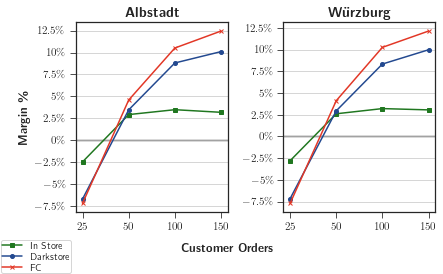

In [50]:
plt.style.use("seaborn-ticks")

fig, (ax1,ax2) = plt.subplots(1,2, figsize=set_size(445))

xticks = [1,2,3,4]
labels = ["$25$","$50$", "$100$", "$150$"]

ax1.set_title("\\textbf{Albstadt}", fontsize=14)
ax2.set_title("\\textbf{Würzburg}", fontsize=14)
ax1.set_ylabel("\\textbf{Margin \%}")
fig.supxlabel("\\textbf{Customer Orders}", y = 0.05, fontsize=12)


ax1.plot(xticks, alb_IS_list, label="In Store", color="#207720",marker = "s", ms=4)
ax1.plot(xticks, alb_D_list, label = "Darkstore", color="#234990" ,marker = "o", ms=4)
ax1.plot(xticks, alb_F_list, label= "FC", color = "#E23726" ,marker = "x", ms=4)

ax2.plot(xticks, wue_IS_list, label="In Store", color="#207720",marker = "s", ms=4)
ax2.plot(xticks, wue_D_list, label = "Darkstore", color="#234990",marker = "o", ms=4)
ax2.plot(xticks, wue_F_list, label= "FC", color = "#E23726",marker = "x", ms=4)


ax1.set_xticks(xticks)
ax1.set_xticklabels(labels, rotation = 0)
ax2.set_xticks(xticks)
ax2.set_xticklabels(labels, rotation = 0)

loc =plticker.MultipleLocator(base=2.5)
ax1.yaxis.set_major_locator(loc)
ax2.yaxis.set_major_locator(loc)

ax1.yaxis.grid(True)
ax2.yaxis.grid(True)

ax1.axhline(y=0,xmin=0,xmax=1,c="black",linewidth=1.3,zorder=0)
ax2.axhline(y=0,xmin=0,xmax=1,c="black",linewidth=1.3,zorder=0)


ax1.set_yticks([-7.5,- 5.0, -2.5, 0, 2.5, 5, 7.5, 10, 12.5],["$-7.5\%$", "$-5\%$", 
                    "$-2.5\%$", "$0\%$", "$2.5\%$","$5\%$","$7.5\%$","$10\%$","$12.5\%$" ], rotation=0)
ax2.set_yticks([-7.5,- 5.0, -2.5, 0, 2.5, 5, 7.5, 10, 12.5],["$-7.5\%$", "$-5\%$", 
                    "$-2.5\%$", "$0\%$", "$2.5\%$","$5\%$","$7.5\%$","$10\%$","$12.5\%$" ], rotation=0)

handles, labels = ax1.get_legend_handles_labels()
fig.legend(handles, labels, loc='lower left', frameon=True,
           fancybox=True, ncol=1, borderpad=0.1, labelspacing = 0.2, borderaxespad=0.1)


fig.tight_layout()
plt.show()
fig.savefig("result_graph/basket_prof.svg", format="svg")